In [ ]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
mnist = fetch_openml('mnist_784')

In [ ]:
x, y = mnist['data'], mnist['target']

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
x.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

In [ ]:
x_train, x_test = x[:60000], x[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]

In [ ]:
X_train = x_train
x_train.shape  # 60 thousand training data set
X_train = np.array(X_train)

In [ ]:
x_test = np.array(x_test)
x_test.shape   # 10 thousand testing data set

(10000, 784)

In [ ]:
y_train = y_train.astype(np.int)
y_train.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


(60000,)

In [ ]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

In [ ]:
y_test = y_test.astype(np.int)
y_test.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


(10000,)

# DATA visualisation

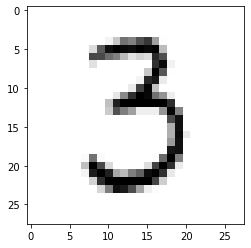

In [ ]:
some_image = x[50]
some_image = some_image.reshape(28,28)
plt.imshow(some_image, cmap=matplotlib.cm.binary,interpolation='nearest')

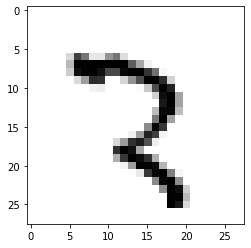

In [ ]:
some_image = x[500]
some_image = some_image.reshape(28,28)
plt.imshow(some_image, cmap=matplotlib.cm.binary,interpolation='nearest')

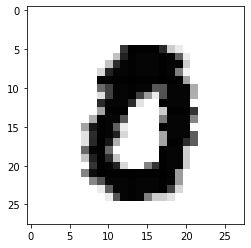

In [ ]:
some_image = x[69]
some_image = some_image.reshape(28,28)
plt.imshow(some_image, cmap=matplotlib.cm.binary,interpolation='nearest')

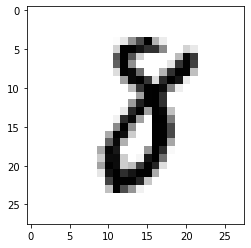

In [ ]:
some_image = x[784]
some_image = some_image.reshape(28,28)
plt.imshow(some_image, cmap=matplotlib.cm.binary,interpolation='nearest')

# PCA on CIFAR-10 dataset with Hyperparameter = 15

In [ ]:
pca = PCA(n_components=15)  # PCA with n_components = 15  i.e no of dimensions will be redueced to 15 from 784
pca.fit(x_train,y_train)

PCA(n_components=15)

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [ ]:
print('Accuracy' , accuracy_score(y_test, y_pred))

Accuracy 0.6364


# Applying FDA on transformed dataset

In [ ]:
class_list = []
for i in range(10):
  class_list.append([])

In [ ]:
for i in range(60000):                # separating data classwise out of 60K ,  6K sample beglongs to each class
  class_list[y_train[i]].append(X_train[i])

In [ ]:
class_list = np.array(class_list) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
X_list = []                        # converted the N x D format to D x N for each class for computation
for i in range(10):
  class_list[i] = np.array(class_list[i])
  X_list.append(class_list[i].transpose())
  

X_list[0].shape

(784, 5923)

In [ ]:
# finding scatter matrix of each class Xi

Sw = np.zeros([784,784])          # Sw matrix = S1 + S2 + S3 

for i in range(10):

  A = X_list[i] - X_list[i].mean(axis = 1, keepdims=True)
  B = A.transpose()
  S = A@B
  Sw = Sw + S

Sw.shape  

(784, 784)

In [ ]:
# finding ST matrix  Total Scatter matrix
XT = np.zeros([784,6000])

for i in range(10):
  XT = XT + X_list[i]                    # XT = X1 + X2 + X3 + X4 + .......
XT = XT - XT.mean(axis = 1 , keepdims=True)    # (XT - Ux)
XTT = XT.transpose()                           # (XT - Ux)'

ST = XT@XTT                  # ST = (XT - Ux)(XT - Ux)'         total scatter matrix

ST.shape 

In [ ]:
SB = ST - Sw      # class scatter matrix = Total Scatter - Sw

SB.shape

In [ ]:
Temp = np.linalg.inv(Sw)   # inverse of Sw matrix 
Temp = Temp@SB
Temp.shape

# LDA on transformed data

In [ ]:
lda = LDA()
lda.fit(x_train, y_train)

NameError: ignored

In [ ]:
y_pred = lda.predict(x_test)
print("Accuracy => ", accuracy_score(y_test, y_pred))

# Plotting the confusion matrix , 
# confusion matrix gives the classwise accuracy

In [ ]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':10})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

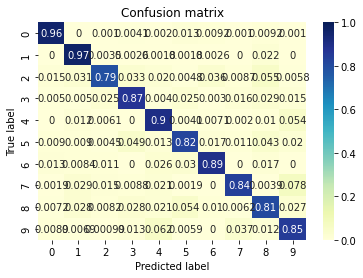

In [ ]:
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report
cm3 = confusion_matrix(y_test, y_pred)
cm_norm3 = cm3 / cm3.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm3, classes = [0,1,2,3,4,5,6,7,8,9], title='Confusion matrix')